In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

### Western Electric Rules

Rule 1: Any single data point falls outside the 3σ-limit from the centerline (i.e., any point that falls outside Zone A, beyond either the upper or lower control limit)

In [2]:
#myArr = [1,2,3,3,4,2,5,4]
#myArr = pd.Series(np.random.randint(50, 100, size=100))
myArr = np.random.randint(50, 100, size=100)

In [3]:
#np.append(myArr,1)

In [4]:
arr_mean = np.mean(myArr)
arr_mean

74.27

In [5]:
flag = [21,22,23,24]

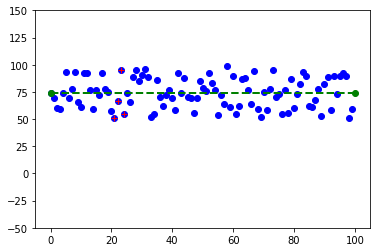

In [6]:
plt.ylim(-50, 150)
plt.plot(myArr,'bo')
plt.plot([0,100],[arr_mean,arr_mean],'go--',linewidth=2)
plt.plot(myArr, color='red',markevery=flag, ls="", marker="+", label="points")
plt.show()

In [7]:
def rando():
    theNum = np.random.randint(50,100)
    return theNum

In [8]:
def testRule1(arr,newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    sigUp = themean + sd*3
    sigDown = themean - sd*3
    if newNum > sigUp:
        print(f"Rule 1 Violation. Upper Control Limit (UCL -- mean + 3SD) is {round(sigUp,1)}")
        proceed(newNum)
    elif newNum < sigDown:
        print(f"Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is {round(sigDown,1)}.")
        proceed(newNum)
    else:
        myArr.append(newNum)
        print("New datum added to list")
        print(f"New array: {myArr}")
    keepOn = input("Continue with monitoring (y/n)? \n")
        
    

In [9]:
#Need to figure out the order of operators of the formatting
#Rule 1 through 4, return if positive
#Or, could just do a combo of formats
#Fill color, size, marker, and edge
#Maybe have two arrays, a value array with the actual value, and a format array with a format value from 1 to 4,
#corresponding with the rule formatting
#just plot the 4 arrays, different sizes and colors, if one violates all they become a combination of values
#1 calls 2, 2 calls 3, 3 calls 4 then returns
# The all_vals array is first plotted, then 1, 2, 3, 4 in order of decreasing size, try it
#all vals may have to be plotted last, as the smallest formatted datum, the others are larger and different colors


In [104]:
def testRule1b(obj,newNum, mean, sd):
    sigUp = mean + sd*3
    sigDown = mean - sd*3
    if newNum > sigUp or newNum < sigDown:
        obj['format_1'] = np.append(obj['format_1'],1)
    else:
        obj['format_1'] = np.append(obj['format_1'],0)
    return

In [105]:
#testing whether there are two out of three consecutive numbers above the line
def testRule2b(obj, newNum, mean, sd):
    twoSigUp = mean + sd*2
    twoSigDown = mean - sd*2
    temp_clipped = obj['all_vals'][-2:]
    temp_clipped = np.append(temp_clipped,newNum)
    above2 = temp_clipped > twoSigUp
    below2 = temp_clipped < twoSigDown
    if (above2.sum(axis=0) >= 2) or (below2.sum(axis=0) >= 2):
        obj['format_2'] = np.append(obj['format_2'],1)
    else:
        obj['format_2'] = np.append(obj['format_2'],0)
    return
    
    

In [106]:
def testRule3b(obj, newNum, mean, sd):
    oneSigUp = mean + sd
    oneSigDown = mean - sd
    temp_clipped = obj['all_vals'][-5:]
    temp_clipped = np.append(temp_clipped,newNum)
    above1 = temp_clipped > oneSigUp
    below1 = temp_clipped < oneSigDown
    if (above1.sum(axis=0) >= 4) or (below1.sum(axis=0) >= 4):
        obj['format_3'] = np.append(obj['format_3'],1)
    else:
        obj['format_3'] = np.append(obj['format_3'],0)
    return

In [107]:
def testRule4b(obj, newNum, mean):
    temp_clipped = obj['all_vals'][-8:]
    temp_clipped = np.append(temp_clipped,newNum)
    above = temp_clipped > mean
    below = temp_clipped < mean
    if (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9):
        obj['format_4'] = np.append(obj['format_4'],1)
    else:
        obj['format_4'] = np.append(obj['format_4'],0)
    return

In [108]:
def violations(obj,datum):
    
    theMean = np.mean(obj['all_vals'])
    sd = np.std(obj['all_vals'])
    testRule1b(obj,datum, theMean, sd)
    testRule2b(obj,datum, theMean, sd)
    testRule3b(obj,datum, theMean, sd)
    testRule4b(obj,datum, theMean)
    return

In [109]:
def assign_datum(obj,datum = None):
    if(datum is None):
        datum = rando()
    violations(obj,datum)
    obj['all_vals'] = np.append(obj['all_vals'],datum)
    print(obj['all_vals'])
    print(obj['format_4'])
    print(obj['format_3'])
    print(obj['format_2'])
    print(obj['format_1'])
    return
    

In [110]:
trendObj = {'all_vals': np.random.randint(50, 100, size=100),
            'format_1': np.zeros(100),
            'format_2': np.zeros(100),
            'format_3': np.zeros(100),
            'format_4': np.zeros(100),
           }


In [111]:
#formatting for chart
def format_arr(rule):
    rule_arr = 'format_' + str(rule)
    return [index for index,val in enumerate(trendObj[rule_arr]) if val]


In [69]:
#index is off for the formatting

In [113]:
assign_datum(trendObj,102)

[ 72  68  74  57  65  78  65  84  78  72  86  64  71  79  95  70  74  94
  69  99  62  79  64  71  67  86  57  84  81  74  71  91  62  62  97  76
  57  66  96  83  85  65  77  78  89  81  88  96  59  62  71  62  70  91
  96  74  76  75  73  72  58  68  59  98  66  72  52  83  89  50  80  64
  51  54  74  94  85  69  50  94  83  62  53  52  53  75  53  65  85  68
  59  79  91  64  77  95  53  59  58  54 102 102]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [57]:
mean = np.mean(trendObj['all_vals'])
temp_clipped = trendObj['all_vals'][-8:]
print(f'temp_clipped = {temp_clipped}')
temp_clipped = np.append(temp_clipped,120)
above = temp_clipped > mean
print(f'above = {above}')
below = temp_clipped < mean
print(f'below = {below}')
print(above.sum(axis=0) >= 9)
if (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9):
    print('violation')
    #obj['format_4'] = np.append(obj['format_4'],4)


temp_clipped = [102 102 102 102 102 102 102 102]
above = [ True  True  True  True  True  True  True  True  True]
below = [False False False False False False False False False]
True
violation


In [ ]:
assign_datum(trendObj)

In [81]:
format_arr(4)

[100]

In [83]:
len(trendObj['format_4'])

101

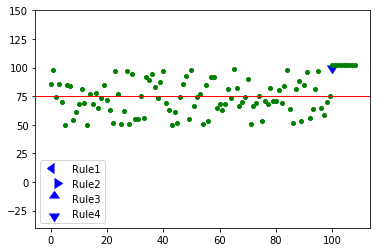

In [80]:
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(1), ls="", marker=8, label="Rule1", markersize=10.0)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(2), ls="", marker=9, label="Rule2", markersize=10.0)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(3), ls="", marker=10, label="Rule3", markersize=10.0)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(4), ls="", marker=11, label="Rule4", markersize=10.0)
plt.plot(trendObj['all_vals'], color='green', ls="", marker="o", markersize=4.0)
plt.axhline(y=np.mean(trendObj['all_vals']), linewidth=1, color='r')
plt.legend()
plt.ylim(-40, 150)
#plt.plot([0,len(trendObj['all_vals'])],[np.mean(trendObj['all_vals']),np.mean(trendObj['all_vals'])],'go--',linewidth=2)
plt.show()

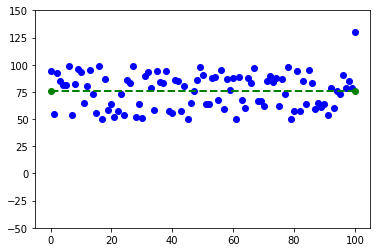

In [21]:
plt.ylim(-50, 150)
plt.plot(trendObj['all_vals'],'bo')
arr_mean = np.mean(trendObj['all_vals'])
plt.plot([0,100],[arr_mean,arr_mean],'go--',linewidth=2)
#plt.plot(trendObj['all_vals', color='red',markevery=flag, ls="", marker="+", label="points")
#markevery will use the index to format the values
plt.show()

In [22]:
def proceed(num):
    while True:
        result = input("Add to data set? (y/n) \n")
        if result.lower() not in ('y','n'):
            print('Sorry, not a valid response')
            continue
        else:
            break
    if result == 'y':
        myArr.append(num)
        print("New datum added to list")
     
    

In [ ]:
testRule1(myArr,5)

Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is 33.1.


In [ ]:
keepGoing = True
while keepGoing:
    question = input("Should I keep going? \n")
    if question == 'n':
        print("Ok, thanks for playing!")
        keepGoing = False

Rule 2: Two out of three consecutive points fall beyond the 2σ-limit (in zone A or beyond), on the same side of the centerline

In [ ]:
#testing whether there are two out of three consecutive numbers above the line
def testRule2(arr, newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    twoSigUp = themean + sd*2
    twoSigDown = themean - sd*2
    arr.append(newNum)
    clipped = np.array(arr)[-3:]
    above2 = clipped > twoSigUp
    below2 = clipped < twoSigDown
    print(f'low: {round(twoSigDown,1)}, high: {round(twoSigUp,1)}')
    if (above2.sum(axis=0) >= 2) or (below2.sum(axis=0) >= 2):
        print("Violation")
        print(clipped)
    else:
        print("all good")
    
    

In [ ]:
myList = [3,4,3,6,5,4,7,7]

In [ ]:
testRule2(myList, 20)

In [ ]:
#myArr = [1,2,3,3,4,2,5,4]
myArr = list(np.random.randint(50, 100, size=100))

Rule 3: Four out of five consecutive points fall beyond the 1σ-limit (in zone B or beyond), on the same side of the centerline.

In [ ]:
def testRule3(arr, newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    oneSigUp = themean + sd
    oneSigDown = themean - sd
    arr.append(newNum)
    clipped = np.array(arr)[-5:]
    above2 = clipped > oneSigUp
    below2 = clipped < oneSigDown
    print(f'low: {round(oneSigDown,1)}, high: {round(oneSigUp,1)}')
    if (above2.sum(axis=0) >= 4) or (below2.sum(axis=0) >= 4):
        print("Violation")
        print(clipped)
    else:
        print("all good")

In [ ]:
rule3List = [3,4,3,6,5,4,7,7,8,10,15,10,10,15]

In [ ]:
testRule3(rule3List,15)

Rule 4	NINE consecutive points fall on the same side of the centerline (in zone C or beyond)

In [ ]:
def testRule4(arr, newNum):
    theMean = stat.mean(arr)
    sd = stat.stdev(arr)
    arr.append(newNum)
    clipped = np.array(arr)[-9:]
    above = clipped > theMean
    below = clipped < theMean
    print(f'mean:{round(theMean,1)}')
    if (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9):
        print("Violation")
        print(clipped)
    else:
        print("all good")

In [ ]:
rule4List = [3,4,3,6,5,4,7,7,8,10,15,10,10,15,15,15,15,15]

In [ ]:
testRule4(rule4List,15)